In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_func(x):
    return 0

def squared_exponential_kernel(x1, x2):
    v0 = 1 # signal variance
    l = 1 # length scale
    return v0 * np.exp(-0.5 * (x1 - x2)**2 / l**2)

def polynomial_kernel(x1, x2):
    alpha = 1
    degree = 2
    return alpha*(1 + np.dot(x1, x2))**degree

def neuronal_network_kernel(x1, x2):
    # cov = np.identity(x1.shape[0])
    # a = lambda x1, x2: 2*np.dot(x1.T, cov).dot(x2)
    a = lambda x1, x2: 2*x1*x2
    return 2/np.pi * np.arcsin(a(x1, x2) / np.sqrt((1 + a(x1, x1)) * (1 + a(x2, x2))))

In [4]:
def gaussian_process_sample(mean_func, kernel_func, x, num_samples=1):
    """
    Generate samples from a Gaussian process.

    Parameters:
    - mean_func: Mean function applied element-wise to a vector
    - kernel_func: Covariance (kernel) function applied element-wise to pairs of vectors
    - x_values: Input values (vectorized)
    - num_samples: Number of samples to generate

    Returns:
    - samples: NumPy array containing generated samples
    """

    # Calculate mean vector
    mean_vector = [mean_func(x_i) for x_i in x]

    # Calculate covariance matrix
    covariance_matrix = [[kernel_func(x_i, x_j) for x_i in x] for x_j in x]

    # Generate samples from multivariate normal distribution
    samples = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)
    
    return samples

In [5]:
def plot_samples(x, y, mean_func, title):
    """
    Plot samples from a Gaussian process.

    Parameters:
    - x: Input values
    - y: Samples
    - mean_func: Mean function applied element-wise to a vector
    - title: Plot title
    """

    # Calculate mean vector
    mean_vector = [mean_func(x_i) for x_i in x]

    # Plot wit legend and title
    fig, ax = plt.subplots()
    fig.suptitle(title, fontsize=16)
    ax.set_xlabel('x')
    ax.set_ylabel('f')    
    ax.plot(x, y.T)
    ax.plot(x, mean_vector, color='black', linestyle='dashed', label='mean')
    ax.legend()
    plt.show()

In [6]:
def compute_cov_matrices(x, x_train, kernel_func):
    """
    Compute covariance matrices.

    Parameters:
    - x: Input values
    - x_train: Training input values
    - kernel_func: Covariance (kernel) function applied element-wise to pairs of vectors

    Returns:
    - K: Covariance matrix
    - K_star: Covariance matrix between training and test data
    - K_star_star: Covariance matrix between test data
    """

    # Calculate covariance matrices
    C = np.array([[kernel_func(x_i, x_j) for x_i in x_train] for x_j in x_train])
    C_star = np.array([[kernel_func(x_i, x_j) for x_i in x] for x_j in x])
    R = np.array([[kernel_func(x_i, x_j) for x_i in x] for x_j in x_train])

    return C, C_star, R

## Exercise 1

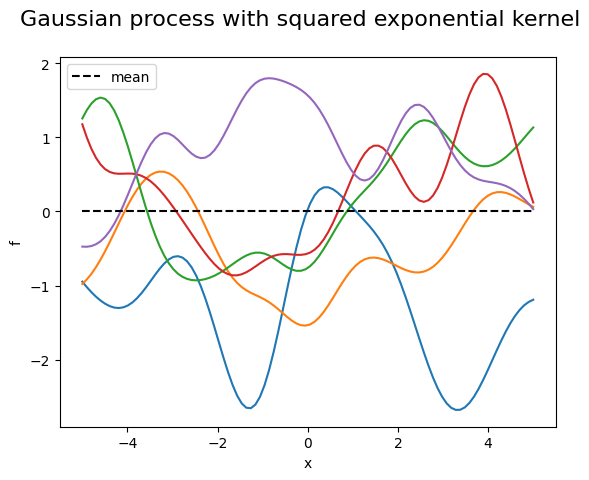

In [7]:
# Exercise 1
x = np.linspace(-5, 5, 100)

y = gaussian_process_sample(mean_func, squared_exponential_kernel, x, num_samples=5)
plot_samples(x, y, mean_func, "Gaussian process with squared exponential kernel")

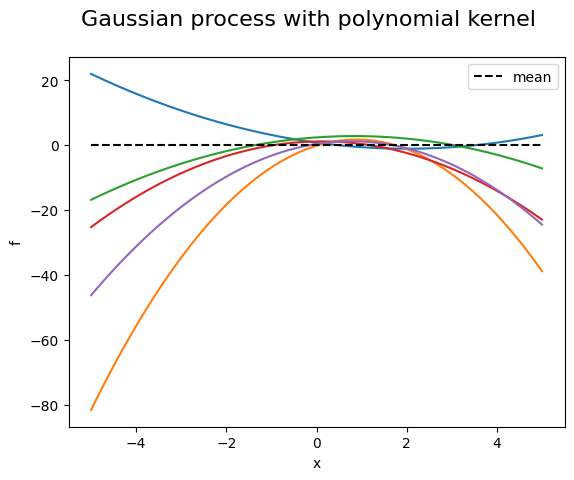

In [8]:
y = gaussian_process_sample(mean_func, polynomial_kernel, x, num_samples=5)
plot_samples(x, y, mean_func, "Gaussian process with polynomial kernel")

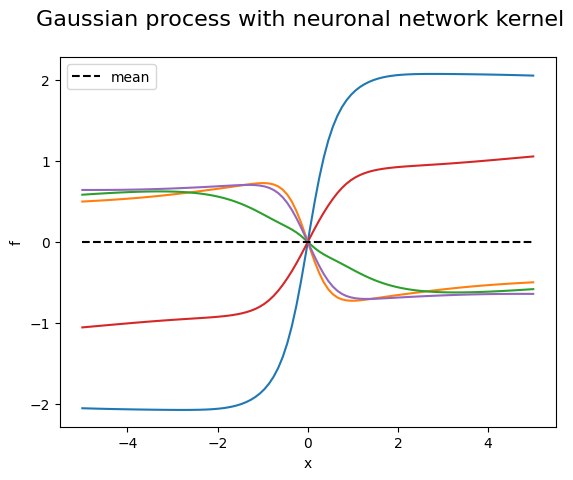

In [9]:
y = gaussian_process_sample(mean_func, neuronal_network_kernel, x, num_samples=5)
plot_samples(x, y, mean_func, "Gaussian process with neuronal network kernel")

## Exercise 2

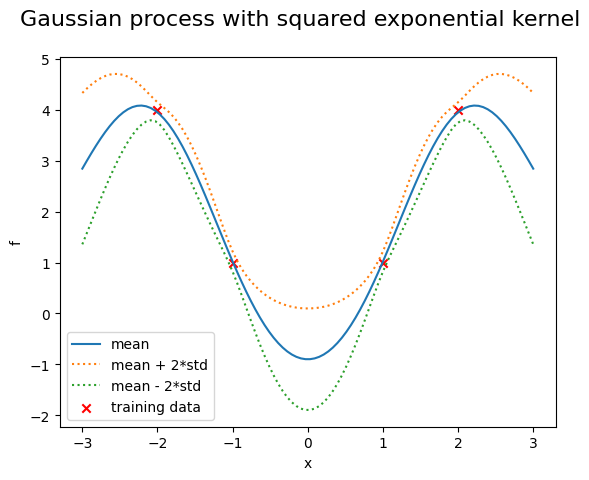

In [10]:
x = np.linspace(-3, 3, 100)
x_train = np.array([-1, -2, 1, 2])
y_train = np.array([1, 4, 1, 4])

# --------------------------------------
# f = lambda x: x**2
sigma = 0.1
# epsilon = np.random.normal(0, sigma, 4)
# --------------------------------------

C, C_star, R = compute_cov_matrices(x, x_train, squared_exponential_kernel)
mean = np.dot(R.T, np.linalg.inv(C + sigma**2 * np.identity(4))).dot(y_train)
variance = C_star - np.dot(R.T, np.linalg.inv(C + sigma**2 * np.identity(4))).dot(R)

# Plot wit legend and title
fig, ax = plt.subplots()
fig.suptitle("Gaussian process with squared exponential kernel", fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.plot(x, mean, label='mean')
ax.plot(x, mean + 2*np.sqrt(np.diag(variance)), linestyle='dotted', label='mean + 2*std')
ax.plot(x, mean - 2*np.sqrt(np.diag(variance)), linestyle='dotted', label='mean - 2*std')
ax.scatter(x_train, y_train, color='red', marker='x', label='training data')
ax.legend()
plt.show()